In [1]:
%load_ext autoreload
%autoreload 2

from itertools import product
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from basis_expansions import (Binner,
                              GaussianKernel,
                              Polynomial, 
                              LinearSpline, 
                              CubicSpline,
                              NaturalCubicSpline)
from dftransformers import ColumnSelector, FeatureUnion, Intercept, MapFeature

from simulation import (run_simulation_expreiment, 
                        plot_simulation_expreiment, 
                        make_random_train_test,
                        run_residual_simulation)

In [3]:
df_Dec = pd.read_csv('/Users/elizabethg/project_jitterbug/CSVs/FRA-PHL_jitterbug_Decdata.csv')

In [4]:
df_Jan = pd.read_csv('/Users/elizabethg/project_jitterbug/CSVs/FRA-PHL_jitterbug_Jandata.csv')

In [5]:
df = pd.concat([df_Dec, df_Jan])

In [6]:
df

,quote_config_public_id,datevalue,fx_rate,mid_market_fx,mid_market_diff,take_rate,send_amount,txn_revenue,submitted
0,d049dedb93b44a32a7c140d5a0a6e973,2020-12-18,58.21,58.8238,0.6138,0.010435,0.000000,0.000000,0
1,4982b9defd2d4054a25d571625a61655,2020-12-18,58.26,58.8600,0.6000,0.010194,0.000000,0.000000,0
2,ee9737eecb93408a9fb837c71661ad9c,2020-12-18,58.26,58.9100,0.6500,0.011034,0.000000,0.000000,0
3,1beeee2e4a584ecf84fed47f6bb49c9a,2020-12-18,58.24,58.9100,0.6700,0.011373,220.946201,6.067925,1
4,9fca4f99f14b41118edcd153c27088c4,2020-12-18,58.28,58.8600,0.5800,0.009854,31.536457,3.951037,1
...,...,...,...,...,...,...,...,...,...
28001,a18033e288d84902871de7fb73256331,2021-01-26,57.84,58.4600,0.6200,0.010606,0.000000,0.000000,0
28002,bdecdc76be0b496faa8a9131f3b861e0,2021-01-26,57.81,58.4600,0.6500,0.011119,0.000000,0.000000,0
28003,833ae7d86b1a4ebba35bdabe30ecaae4,2021-01-26,57.75,58.4800,0.7300,0.012483,0.000000,0.000000,0
28004,1adc13cd3950453bac8bc049460b759c,2021-01-26,57.94,58.4514,0.5114,0.008749,41.987006,3.986807,1


In [18]:
df_nonzero = df[df.submitted == 1]

In [46]:
#group by quantiles
df['quantiles'] = pd.qcut(df['mid_market_diff'], q = 10)

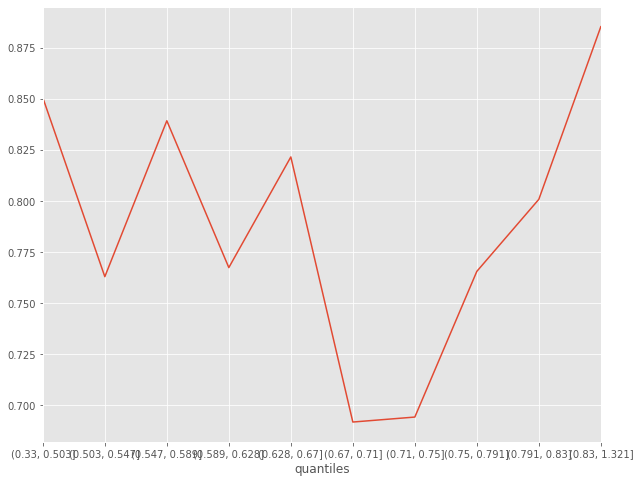

In [47]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = df.groupby('quantiles').txn_revenue.mean().plot()

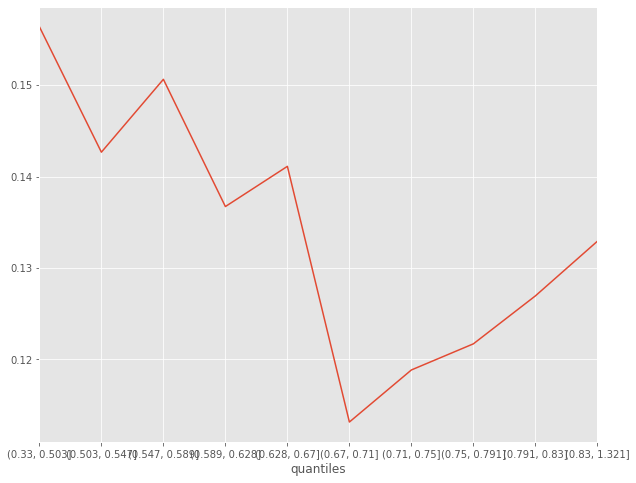

In [48]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = df.groupby('quantiles').submitted.mean().plot()

In [27]:
#define x and y variables for regression
x = df.quantiles
y = df.txn_revenue

In [28]:
def make_binned_regression(n_cuts):
    return Pipeline([
        ('binner', Binner(0, 1, n_cuts=n_cuts)),
        ('regression', LinearRegression(fit_intercept=False))
    ])

regressions = {}
for n_cuts in range(1, 24):
    regressions[n_cuts] = make_binned_regression(n_cuts)
    regressions[n_cuts].fit(x, y)

TypeError: unorderable types: Interval() <= float()

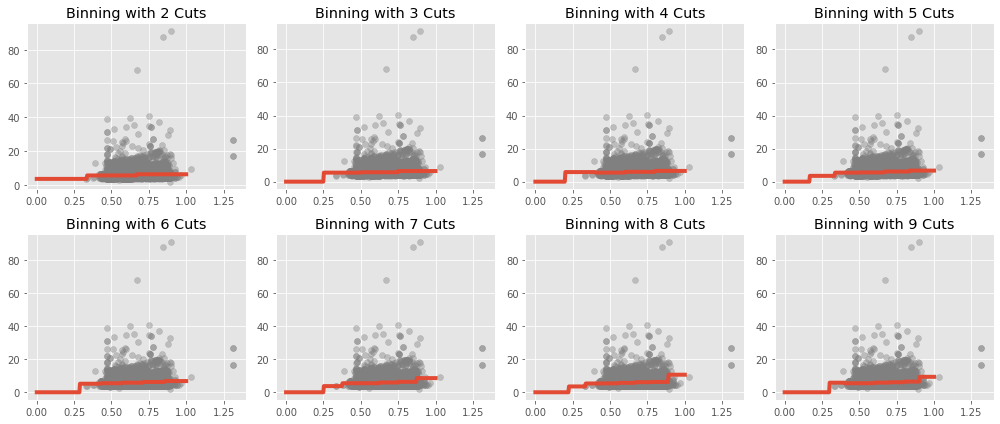

In [21]:
fig, ax = plt.subplots(2, 4, figsize=(14, 6))

t = np.linspace(0, 1, 250)
for n_cuts, ax in enumerate(ax.flatten(), start=2):
    ax.plot(t, regressions[n_cuts].predict(t.reshape(-1, 1)), linewidth=4)
    ax.scatter(x, y, alpha=0.4, color="grey")
    ax.set_title("Binning with {} Cuts".format(n_cuts))

fig.tight_layout()